In [36]:
from statistics import LinearRegression

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib.pyplot import yscale
from pandas.core.common import random_state
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm
import catboost
import xgboost
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [37]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

#### 1. Przeprowadź eksploracyjną analizę danych.

In [38]:
df_test

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight Wi-Fi Service,Departure/Arrival Time Convenient,Ease of Online Booking,...,Seat Comfort,Inflight Entertainment,Onboard Service,Legroom Service,Baggage Handling,Check-in Service,Inflight Service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,19556,Female,Loyal Customer,52,Business Travel,Eco,160,5,4,3,...,3,5,5,5,5,2,5,5,50,44.0
1,90035,Female,Loyal Customer,36,Business Travel,Business,2863,1,1,3,...,5,4,4,4,4,3,4,5,0,0.0
2,12360,Male,Disloyal Customer,20,Business Travel,Eco,192,2,0,2,...,2,2,4,1,3,2,2,2,0,0.0
3,77959,Male,Loyal Customer,44,Business Travel,Business,3377,0,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,36875,Female,Loyal Customer,49,Business Travel,Eco,1182,2,3,4,...,2,2,2,2,2,4,2,4,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,Disloyal Customer,34,Business Travel,Business,526,3,3,3,...,4,4,3,2,4,4,5,4,0,0.0
25972,71167,Male,Loyal Customer,23,Business Travel,Business,646,4,4,4,...,4,4,4,5,5,5,5,4,0,0.0
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,2,4,3,4,5,4,2,0,0.0
25974,90086,Male,Loyal Customer,14,Business Travel,Business,1127,3,3,3,...,4,4,3,2,5,4,5,4,0,0.0


In [39]:
df_train

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight Wi-Fi Service,Departure/Arrival Time Convenient,Ease of Online Booking,...,Inflight Entertainment,Onboard Service,Legroom Service,Baggage Handling,Check-in Service,Inflight Service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,Neutral or dissatisfied
1,5047,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,Neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
3,24026,Female,Loyal Customer,25,Business Travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,Neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business Travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,Disloyal Customer,23,Business Travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,Neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business Travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,Satisfied
103901,68825,Male,Disloyal Customer,30,Business Travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,Neutral or dissatisfied
103902,54173,Female,Disloyal Customer,22,Business Travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,Neutral or dissatisfied


In [40]:
df_train.describe()

,ID,Age,Flight Distance,Inflight Wi-Fi Service,Departure/Arrival Time Convenient,Ease of Online Booking,Gate Location,Food and Drink,Online Boarding,Seat Comfort,Inflight Entertainment,Onboard Service,Legroom Service,Baggage Handling,Check-in Service,Inflight Service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [41]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight Wi-Fi Service             103904 non-null  int64  
 8   Departure/Arrival Time Convenient  103904 non-null  int64  
 9   Ease of Online Booking             103904 non-null  int64  
 10  Gate Location                      103904 non-null  int64  
 11  Food and Drink                     1039

In [42]:
df_test.describe()

,ID,Age,Flight Distance,Inflight Wi-Fi Service,Departure/Arrival Time Convenient,Ease of Online Booking,Gate Location,Food and Drink,Online Boarding,Seat Comfort,Inflight Entertainment,Onboard Service,Legroom Service,Baggage Handling,Check-in Service,Inflight Service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [43]:
df_train.isna().sum()

ID                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight Wi-Fi Service                 0
Departure/Arrival Time Convenient      0
Ease of Online Booking                 0
Gate Location                          0
Food and Drink                         0
Online Boarding                        0
Seat Comfort                           0
Inflight Entertainment                 0
Onboard Service                        0
Legroom Service                        0
Baggage Handling                       0
Check-in Service                       0
Inflight Service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
Satisfaction                           0
dtype: int64

#### 1.2 Zastosuj wybrane metody wizualizacji danych.

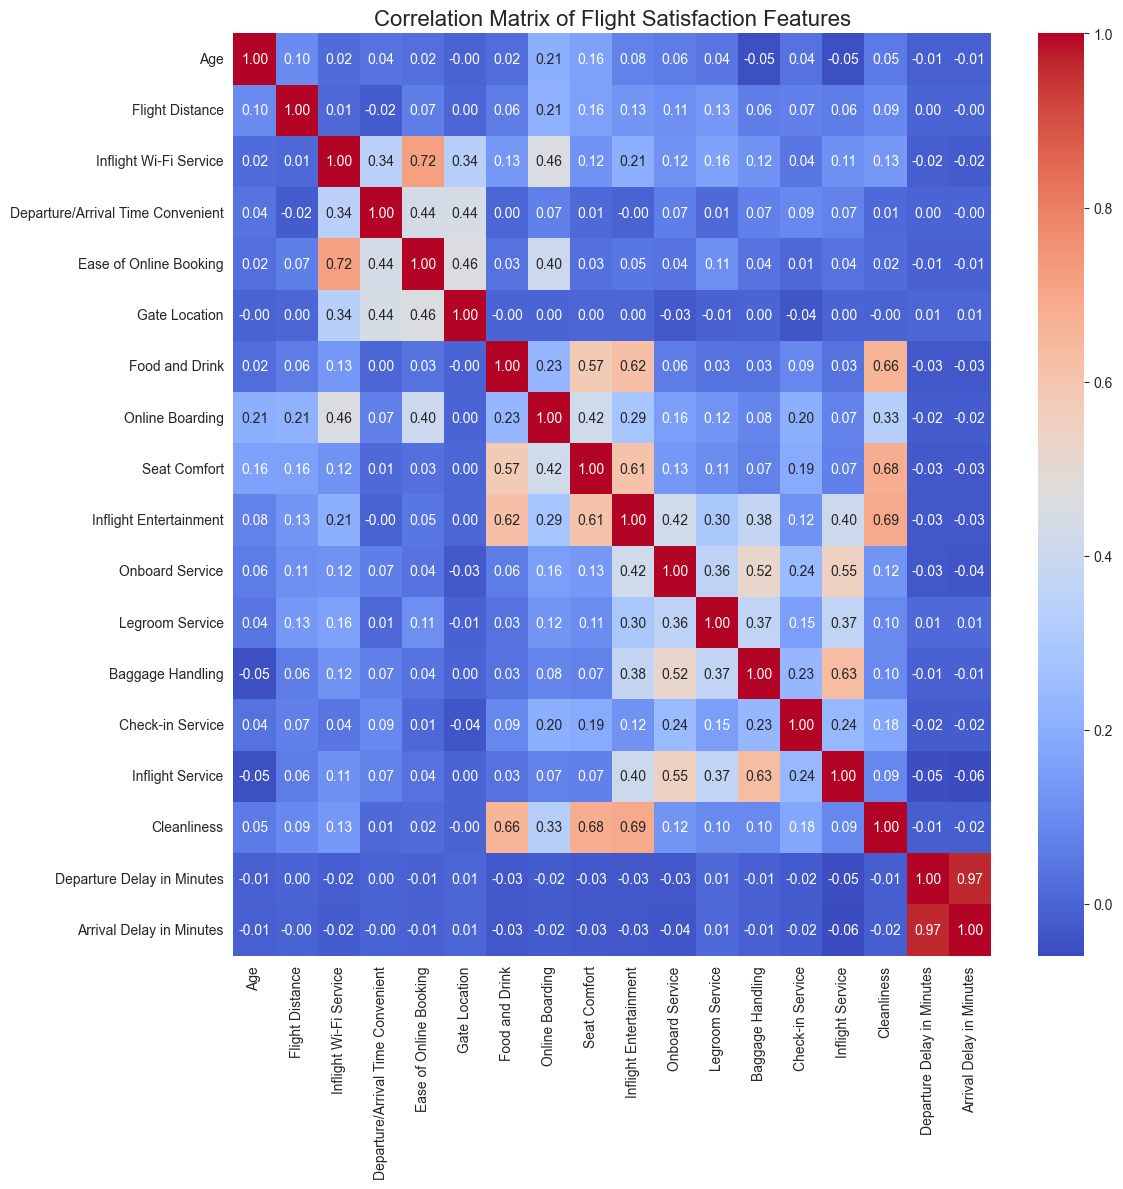

In [44]:
df = df_train[['Age',
       'Flight Distance', 'Inflight Wi-Fi Service',
       'Departure/Arrival Time Convenient', 'Ease of Online Booking',
       'Gate Location', 'Food and Drink', 'Online Boarding', 'Seat Comfort',
       'Inflight Entertainment', 'Onboard Service', 'Legroom Service',
       'Baggage Handling', 'Check-in Service', 'Inflight Service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Flight Satisfaction Features', fontsize=16)
plt.tight_layout()
plt.show()

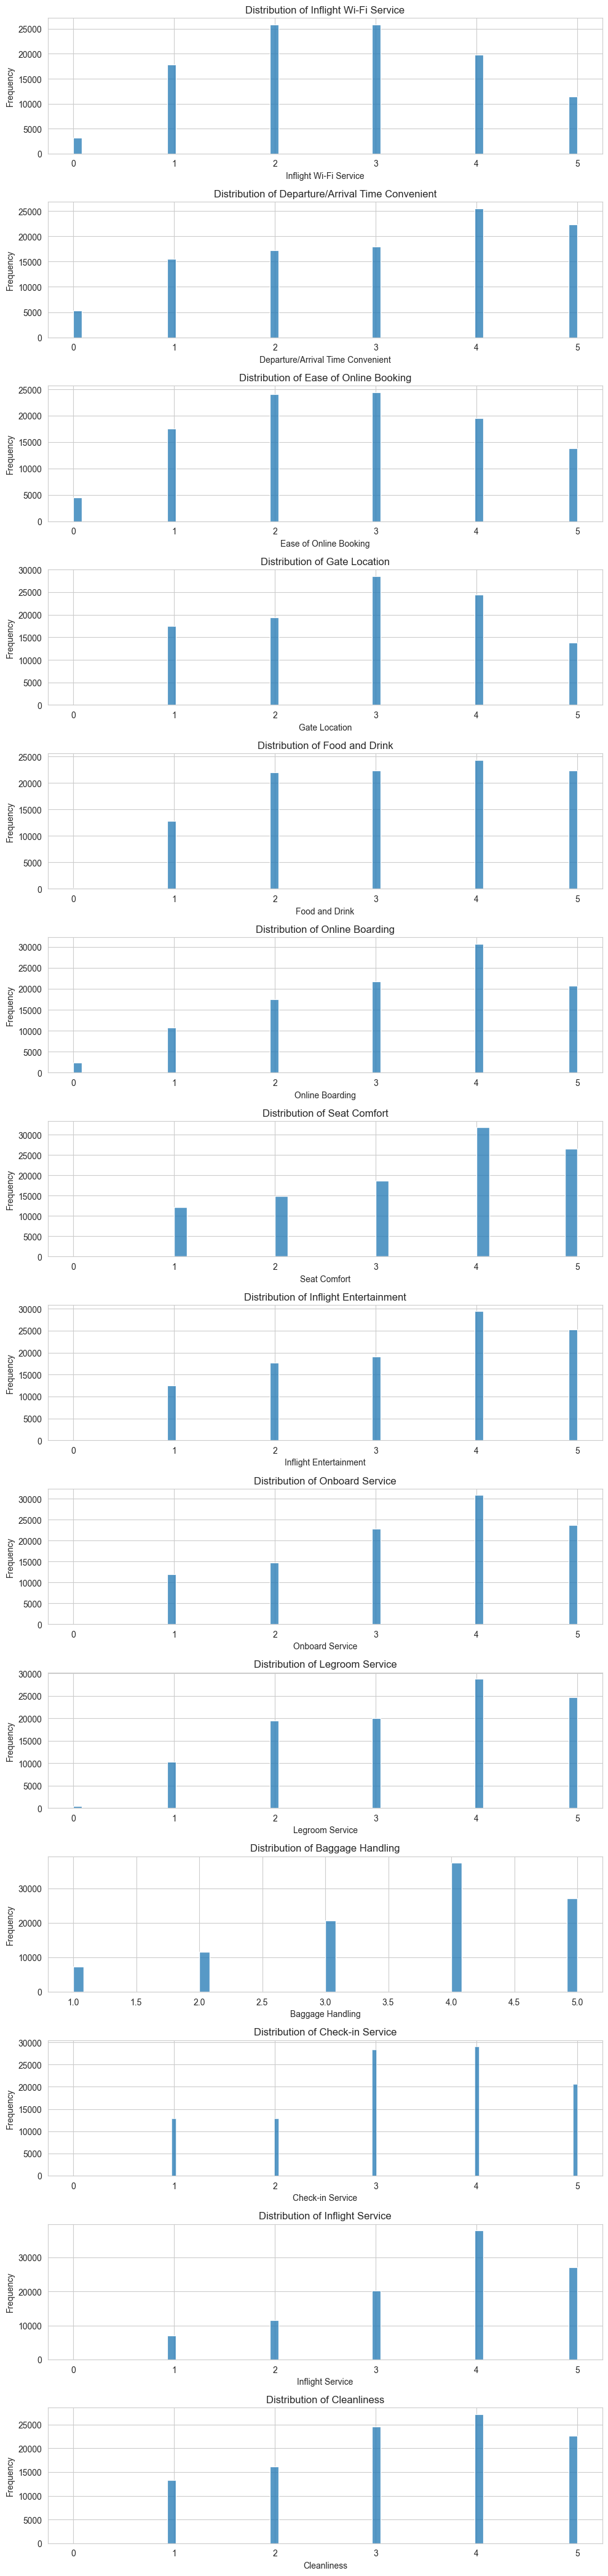

In [45]:
def plot_histograms(df):
    cols = df.columns
    n_cols = len(cols)

    fig, axes = plt.subplots(n_cols, 1, figsize=(10, n_cols * 3))

    for i, col in enumerate(cols):
        data = df[col].dropna()
        sns.histplot(data, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=12)
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

df = df_train[[ 'Inflight Wi-Fi Service',
       'Departure/Arrival Time Convenient', 'Ease of Online Booking',
       'Gate Location', 'Food and Drink', 'Online Boarding', 'Seat Comfort',
       'Inflight Entertainment', 'Onboard Service', 'Legroom Service',
       'Baggage Handling', 'Check-in Service', 'Inflight Service',
       'Cleanliness']]

plot_histograms(df)

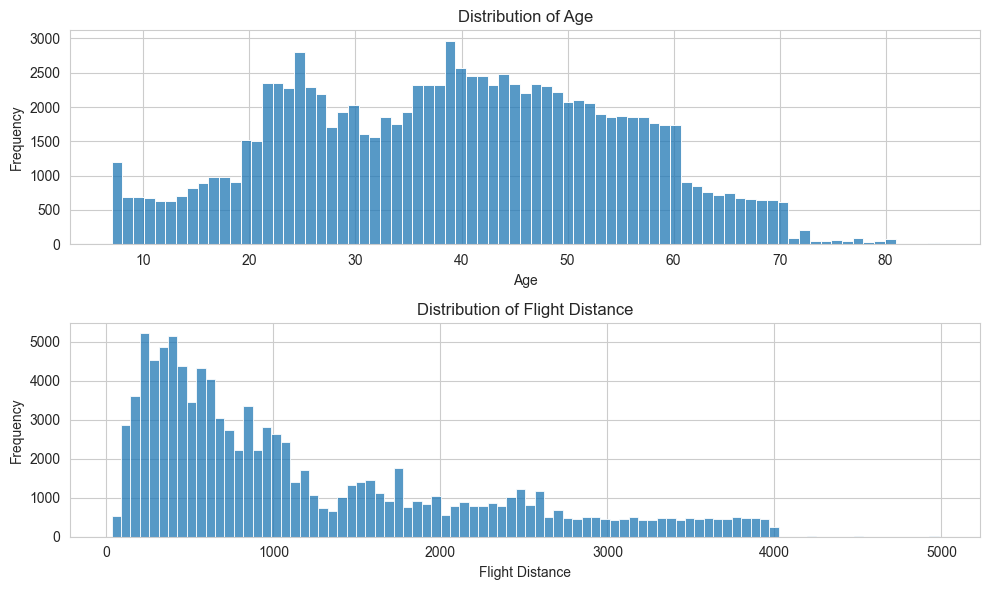

In [46]:
df = df_train[['Age','Flight Distance']]
plot_histograms(df)

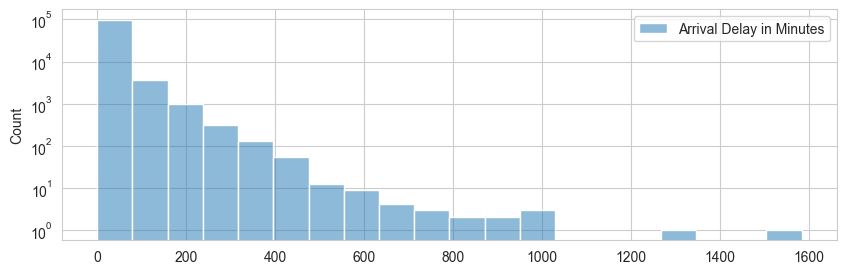

In [47]:
plt.figure(figsize=(10,3))
sns.histplot(df_train[['Arrival Delay in Minutes']], bins=20)
plt.yscale('log')

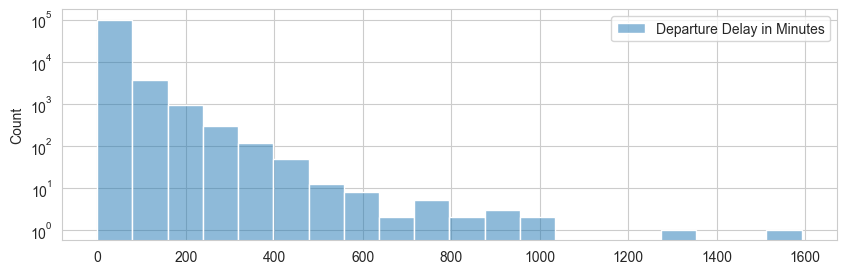

In [48]:
plt.figure(figsize=(10,3))
sns.histplot(df_train[['Departure Delay in Minutes']], bins=20)
plt.yscale('log')

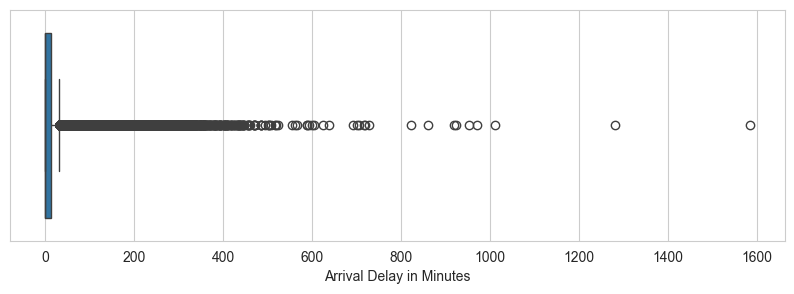

In [49]:
plt.figure(figsize=(10,3))
sns.boxplot(x= df_train['Arrival Delay in Minutes'])
plt.show()

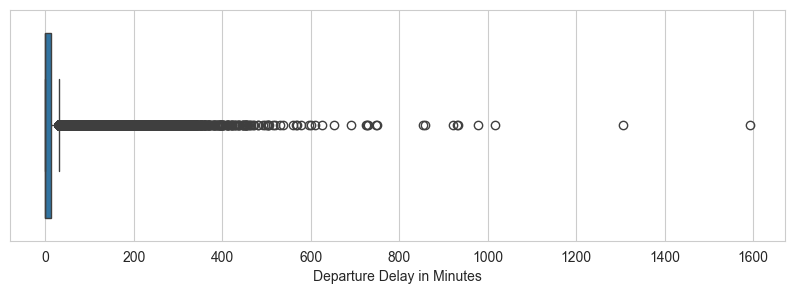

In [50]:
plt.figure(figsize=(10,3))
sns.boxplot(x= df_train['Departure Delay in Minutes'])
plt.show()

#### 2. Rozwiąż problem wartości odstających.

Tylko 2 kolumny ('Arrival Delay in Minutes', 'Departure Delay in Minutes') mają wartości odstające można to zaobserwować na boxplotach z czego jedną należy odrzucić ponieważ są silnie 0.97 skorelowane 

#### 9. Zbadaj rozkład klas. Rozwiąż problem niezbalansowanych danych.
##### Klasy są zbalansowane

In [51]:
satisfaction_counts = df_train['Satisfaction'].value_counts().reset_index()
satisfaction_counts.columns = ['Satisfaction_Level', 'Count']
satisfaction_counts

,Satisfaction_Level,Count
0,Neutral or dissatisfied,58879
1,Satisfied,45025


#### 3. Rozwiąż problem brakujących danych.

Zauważyć można że jedyne kolumny z takimi wartościami to kolumna 'Arrival Delay in Minutes' która zamierzamy odrzucić ze względu na silną korelację z kolumną 'Departure Delay in Minutes'.

In [52]:
df_train.isna().sum()

ID                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight Wi-Fi Service                 0
Departure/Arrival Time Convenient      0
Ease of Online Booking                 0
Gate Location                          0
Food and Drink                         0
Online Boarding                        0
Seat Comfort                           0
Inflight Entertainment                 0
Onboard Service                        0
Legroom Service                        0
Baggage Handling                       0
Check-in Service                       0
Inflight Service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
Satisfaction                           0
dtype: int64

In [53]:
df_test.isna().sum()

ID                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight Wi-Fi Service                0
Departure/Arrival Time Convenient     0
Ease of Online Booking                0
Gate Location                         0
Food and Drink                        0
Online Boarding                       0
Seat Comfort                          0
Inflight Entertainment                0
Onboard Service                       0
Legroom Service                       0
Baggage Handling                      0
Check-in Service                      0
Inflight Service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
dtype: int64

In [54]:
# df_train_nona = df_train.drop(columns= ['Arrival Delay in Minutes','ID'])
# df_test_nona = df_test.drop(columns= ['Arrival Delay in Minutes','ID'])

#### 4. Przeprowadź kodowanie cech kategorialnych.

In [55]:
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns to encode:", categorical_columns)

df_train_encoded = pd.get_dummies(df_train, columns=categorical_columns, drop_first=True)
df_train_encoded


Categorical columns to encode: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']


,ID,Age,Flight Distance,Inflight Wi-Fi Service,Departure/Arrival Time Convenient,Ease of Online Booking,Gate Location,Food and Drink,Online Boarding,Seat Comfort,...,Inflight Service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Satisfaction_Satisfied
0,70172,13,460,3,4,3,1,5,3,5,...,5,5,25,18.0,True,True,True,False,True,False
1,5047,25,235,3,2,3,3,1,3,1,...,4,1,1,6.0,True,False,False,False,False,False
2,110028,26,1142,2,2,2,2,5,5,5,...,4,5,0,0.0,False,True,False,False,False,True
3,24026,25,562,2,5,5,5,2,2,2,...,4,2,11,9.0,False,True,False,False,False,False
4,119299,61,214,3,3,3,3,4,5,5,...,3,3,0,0.0,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,192,2,1,2,3,2,2,2,...,3,2,3,0.0,False,False,False,True,False,False
103900,73097,49,2347,4,4,4,4,2,4,5,...,5,4,0,0.0,True,True,False,False,False,True
103901,68825,30,1995,1,1,1,3,4,1,5,...,5,4,7,14.0,True,False,False,False,False,False
103902,54173,22,1000,1,1,1,5,1,1,1,...,4,1,0,0.0,False,False,False,True,False,False


In [56]:
categorical_columns = df_test.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns to encode:", categorical_columns)

df_test_encoded = pd.get_dummies(df_test, columns=categorical_columns, drop_first=True)
df_test_encoded


Categorical columns to encode: ['Gender', 'Customer Type', 'Type of Travel', 'Class']


,ID,Age,Flight Distance,Inflight Wi-Fi Service,Departure/Arrival Time Convenient,Ease of Online Booking,Gate Location,Food and Drink,Online Boarding,Seat Comfort,...,Check-in Service,Inflight Service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,19556,52,160,5,4,3,4,3,4,3,...,2,5,5,50,44.0,False,True,False,True,False
1,90035,36,2863,1,1,3,1,5,4,5,...,3,4,5,0,0.0,False,True,False,False,False
2,12360,20,192,2,0,2,4,2,2,2,...,2,2,2,0,0.0,True,False,False,True,False
3,77959,44,3377,0,0,0,2,3,4,4,...,3,1,4,0,6.0,True,True,False,False,False
4,36875,49,1182,2,3,4,3,4,1,2,...,4,2,4,0,20.0,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,34,526,3,3,3,1,4,3,4,...,4,5,4,0,0.0,True,False,False,False,False
25972,71167,23,646,4,4,4,4,4,4,4,...,5,5,4,0,0.0,True,True,False,False,False
25973,37675,17,828,2,5,1,5,2,1,2,...,5,4,2,0,0.0,False,True,True,True,False
25974,90086,14,1127,3,3,3,3,4,4,4,...,4,5,4,0,0.0,True,True,False,False,False


#### 5. Wygeneruj nowe cechy.

In [57]:
print(df_train_encoded.columns)

Index(['ID', 'Age', 'Flight Distance', 'Inflight Wi-Fi Service',
       'Departure/Arrival Time Convenient', 'Ease of Online Booking',
       'Gate Location', 'Food and Drink', 'Online Boarding', 'Seat Comfort',
       'Inflight Entertainment', 'Onboard Service', 'Legroom Service',
       'Baggage Handling', 'Check-in Service', 'Inflight Service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_Loyal Customer',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus',
       'Satisfaction_Satisfied'],
      dtype='object')


In [58]:
df_train_encoded_feat = df_train_encoded.copy()

rating_columns = ['Inflight Wi-Fi Service',
'Departure/Arrival Time Convenient', 'Ease of Online Booking',
'Gate Location', 'Food and Drink', 'Online Boarding', 'Seat Comfort',
'Inflight Entertainment', 'Onboard Service', 'Legroom Service',
'Baggage Handling', 'Check-in Service', 'Inflight Service',
'Cleanliness']

df_train_encoded_feat['Average_Flight_Rating'] = df_train_encoded[rating_columns].mean(axis=1)
df_train_encoded_feat['Mode_Flight_Rating'] = df_train_encoded[rating_columns].apply(
    lambda x: stats.mode(x, keepdims=False)[0], axis=1
)
df_train_encoded_feat['Min_Flight_Rating'] = df_train_encoded[rating_columns].min(axis=1)
df_train_encoded_feat['Max_Flight_Rating'] = df_train_encoded[rating_columns].max(axis=1)
df_train_encoded_feat['Range_Flight_Rating'] = df_train_encoded_feat['Max_Flight_Rating'] - df_train_encoded_feat['Min_Flight_Rating']

rating_columns_inflight = ['Inflight Wi-Fi Service',
'Food and Drink', 'Online Boarding', 'Seat Comfort',
'Inflight Entertainment', 'Onboard Service', 'Legroom Service', 'Inflight Service',
'Cleanliness']

df_train_encoded_feat['Average_Inflight_Rating'] = df_train_encoded[rating_columns_inflight].mean(axis=1)
df_train_encoded_feat['Mode_Inflight_Rating'] = df_train_encoded[rating_columns_inflight].apply(
    lambda x: stats.mode(x, keepdims=False)[0], axis=1
)
df_train_encoded_feat['Min_Inflight_Rating'] = df_train_encoded[rating_columns_inflight].min(axis=1)
df_train_encoded_feat['Max_Inflight_Rating'] = df_train_encoded[rating_columns_inflight].max(axis=1)
df_train_encoded_feat['Range_Inflight_Rating'] = df_train_encoded_feat['Max_Inflight_Rating'] - df_train_encoded_feat['Min_Inflight_Rating']

rating_columns_boarding = [
'Departure/Arrival Time Convenient', 'Ease of Online Booking',
'Gate Location', 'Baggage Handling', 'Check-in Service', 'Inflight Service', 'Cleanliness']

df_train_encoded_feat['Average_Boarding_Rating'] = df_train_encoded[rating_columns_boarding].mean(axis=1)
df_train_encoded_feat['Mode_Boarding_Rating'] = df_train_encoded[rating_columns_boarding].apply(
    lambda x: stats.mode(x, keepdims=False)[0], axis=1
)
df_train_encoded_feat['Min_Boarding_Rating'] = df_train_encoded[rating_columns_boarding].min(axis=1)
df_train_encoded_feat['Max_Boarding_Rating'] = df_train_encoded[rating_columns_boarding].max(axis=1)
df_train_encoded_feat['Range_Boarding_Rating'] = df_train_encoded_feat['Max_Boarding_Rating'] - df_train_encoded_feat['Min_Boarding_Rating']

df_train_encoded_feat['Std_Flight_Rating'] = df_train_encoded[rating_columns].std(axis=1)
df_train_encoded_feat['Std_Inflight_Rating'] = df_train_encoded[rating_columns_inflight].std(axis=1)
df_train_encoded_feat['Std_Boarding_Rating'] = df_train_encoded[rating_columns_boarding].std(axis=1)

In [71]:
df_train_encoded_feat

,ID,Age,Flight Distance,Inflight Wi-Fi Service,Departure/Arrival Time Convenient,Ease of Online Booking,Gate Location,Food and Drink,Online Boarding,Seat Comfort,...,Max_Inflight_Rating,Range_Inflight_Rating,Average_Boarding_Rating,Mode_Boarding_Rating,Min_Boarding_Rating,Max_Boarding_Rating,Range_Boarding_Rating,Std_Flight_Rating,Std_Inflight_Rating,Std_Boarding_Rating
0,70172,13,460,3,4,3,1,5,3,5,...,5,2,3.714286,4,1,5,4,1.167321,0.971825,1.380131
1,5047,25,235,3,2,3,3,1,3,1,...,5,4,2.428571,3,1,4,3,1.325987,1.563472,1.133893
2,110028,26,1142,2,2,2,2,5,5,5,...,5,3,3.285714,2,2,5,3,1.266647,1.092906,1.253566
3,24026,25,562,2,5,5,5,2,2,2,...,5,3,3.571429,5,1,5,4,1.467599,1.130388,1.618347
4,119299,61,214,3,3,3,3,4,5,5,...,5,2,3.142857,3,3,4,1,0.759555,0.866025,0.377964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,192,2,1,2,3,2,2,2,...,3,2,2.428571,2,1,4,3,0.801784,0.600925,0.975900
103900,73097,49,2347,4,4,4,4,2,4,5,...,5,3,4.428571,4,4,5,1,0.841897,1.000000,0.534522
103901,68825,30,1995,1,1,1,3,4,1,5,...,5,4,3.285714,1,1,5,4,1.591530,1.563472,1.704336
103902,54173,22,1000,1,1,1,5,1,1,1,...,5,4,2.571429,1,1,5,4,1.815683,1.691482,1.988060


#### 6. Przeprowadź standaryzację danych.

In [72]:
df_train_encoded_feat.fillna(0, inplace=True)

scaler = StandardScaler()
X = df_train_encoded_feat.drop('Satisfaction_Satisfied', axis=1)
X_scaled = scaler.fit_transform(X)

#### 7. Zbadaj korelacje między cechami. Usuń zbędne cechy.

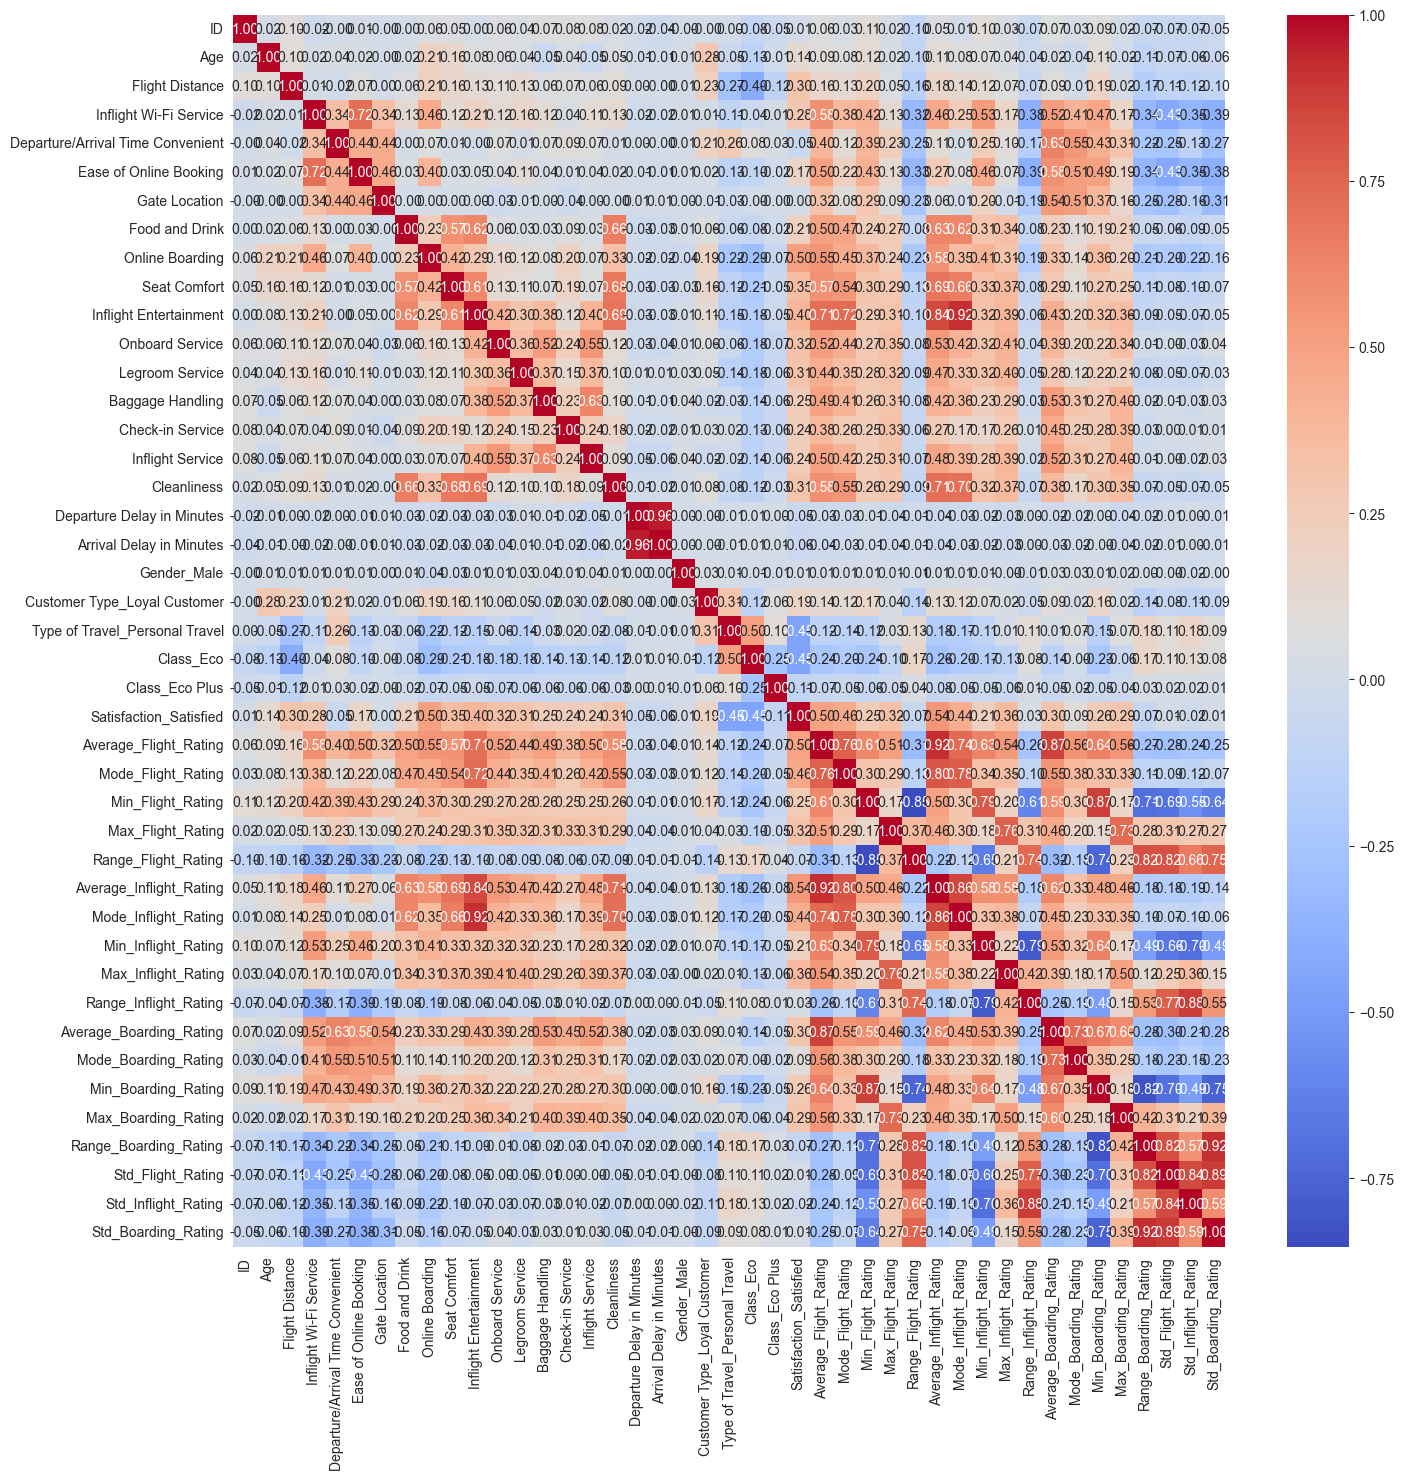

In [73]:
plt.figure(figsize= (16,16))
_ = sns.heatmap(df_train_encoded_feat.corr(), annot=True, fmt=".2f", cmap="coolwarm")

#### 8. Przeprowadź redukcję wymiarowości.

In [74]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", df_train_encoded_feat.shape)
print("PCA shape:", X_pca.shape)
print("Number of components selected:", pca.n_components_)
print("Explained variance ratio:", np.sum(pca.explained_variance_ratio_))

X_pca[:5]

Original shape: (103904, 43)
PCA shape: (103904, 23)
Number of components selected: 23
Explained variance ratio: 0.9511605613909846


array([[ 2.40687806e+00, -2.59288809e+00, -4.51459648e-01,
         1.04137555e+00,  1.68232409e-01, -1.79397282e+00,
        -3.14680014e-01,  1.76424632e+00,  1.65618887e+00,
         3.47165141e+00,  1.71614566e+00, -8.78159651e-01,
         8.93144993e-01, -2.76478479e-01, -1.65140592e+00,
        -1.49027490e-02,  9.52086756e-01,  4.57982139e-01,
        -8.38774040e-02, -6.09174724e-01, -3.73602379e-02,
        -7.45624907e-02,  7.93259323e-01],
       [-4.44848319e+00,  8.88573324e-01,  1.80712413e+00,
        -1.34940099e+00, -2.82995661e-01,  1.03589481e+00,
         2.57967094e+00, -4.09709760e-01, -6.50057188e-01,
        -1.72729014e+00,  2.31164036e+00, -1.80663378e+00,
         1.31619928e-04,  2.13476323e-01, -4.82185599e-02,
        -2.94353886e-01, -3.89463601e-01,  6.25809558e-01,
        -1.59344153e+00, -4.74652309e-01,  3.05675931e-01,
         5.55463172e-01,  3.35897049e-01],
       [ 2.47460253e+00, -2.19690163e+00, -2.50064554e+00,
        -8.02654771e-02, -5.3

#### 10. Zbadaj skuteczność pięciu różnych klasyfikatorów. Zastosuj walidację krzyżową.


In [75]:
X = pd.DataFrame(X_pca)
# X = df_train_encoded.drop('Satisfaction_Satisfied', axis=1)
y = df_train_encoded['Satisfaction_Satisfied']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
df_train_encoded.isna().sum()

ID                                     0
Age                                    0
Flight Distance                        0
Inflight Wi-Fi Service                 0
Departure/Arrival Time Convenient      0
Ease of Online Booking                 0
Gate Location                          0
Food and Drink                         0
Online Boarding                        0
Seat Comfort                           0
Inflight Entertainment                 0
Onboard Service                        0
Legroom Service                        0
Baggage Handling                       0
Check-in Service                       0
Inflight Service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
Gender_Male                            0
Customer Type_Loyal Customer           0
Type of Travel_Personal Travel         0
Class_Eco                              0
Class_Eco Plus                         0
Satisfaction_Sat

In [76]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {}".format(roc_auc))
    print(classification_report(y_test, y_pred, digits=5))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    
    return model, roc_auc

ROC_AUC = 0.924452784168157
              precision    recall  f1-score   support

       False    0.91576   0.96337   0.93896     11713
        True    0.94928   0.88553   0.91630      9068

    accuracy                        0.92941     20781
   macro avg    0.93252   0.92445   0.92763     20781
weighted avg    0.93039   0.92941   0.92907     20781



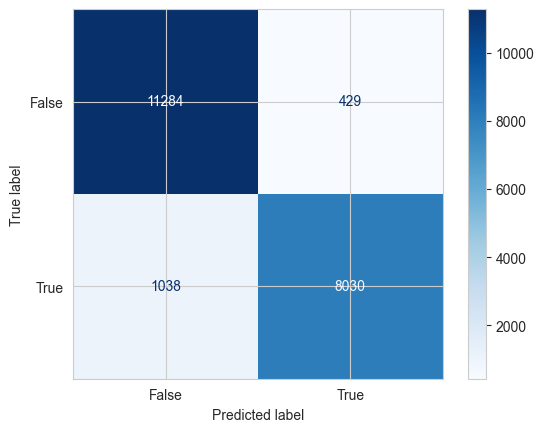

In [77]:
params_rf = {'random_state': 42}
model_rf = RandomForestClassifier(**params_rf)
model_rf, roc_auc_rf = run_model(model_rf, X_train, y_train, X_val, y_val)

[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5865
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350
ROC_AUC = 0.92562858120726
              precision    recall  f1-score   support

       False    0.92528   0.95040   0.93767     11713
        True    0.93360   0.90086   0.91694      9068

    accuracy                        0.92878     20781
   macro avg    0.92944   0.92563   0.92730     20781
weighted avg    0.92891   0.92878   0.92862     20781



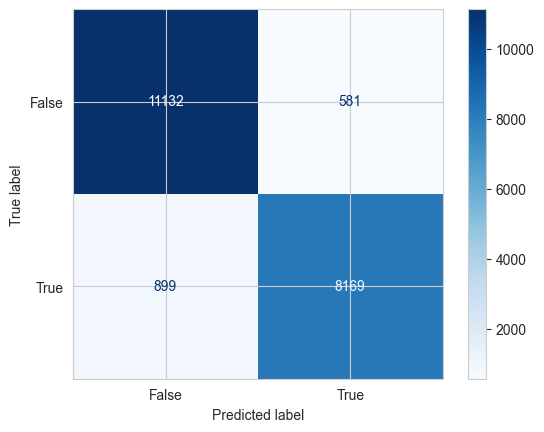

In [78]:
params_lgb = {'random_state': 42}
model_lgb = lightgbm.LGBMClassifier(**params_lgb)
model_lgb, roc_auc_lgb = run_model(model_lgb, X_train, y_train, X_val, y_val)

Learning rate set to 0.068023
0:	learn: 0.6391684	total: 30ms	remaining: 30s
1:	learn: 0.5919952	total: 60.6ms	remaining: 30.3s
2:	learn: 0.5540356	total: 91.9ms	remaining: 30.5s
3:	learn: 0.5210020	total: 118ms	remaining: 29.3s
4:	learn: 0.4942827	total: 148ms	remaining: 29.5s
5:	learn: 0.4674485	total: 182ms	remaining: 30.1s
6:	learn: 0.4456985	total: 218ms	remaining: 30.9s
7:	learn: 0.4282419	total: 251ms	remaining: 31.1s
8:	learn: 0.4145076	total: 287ms	remaining: 31.6s
9:	learn: 0.4014803	total: 322ms	remaining: 31.9s
10:	learn: 0.3890541	total: 356ms	remaining: 32s
11:	learn: 0.3804011	total: 382ms	remaining: 31.5s
12:	learn: 0.3714697	total: 414ms	remaining: 31.4s
13:	learn: 0.3629274	total: 448ms	remaining: 31.6s
14:	learn: 0.3566032	total: 480ms	remaining: 31.6s
15:	learn: 0.3508848	total: 514ms	remaining: 31.6s
16:	learn: 0.3439643	total: 549ms	remaining: 31.7s
17:	learn: 0.3395832	total: 577ms	remaining: 31.5s
18:	learn: 0.3338516	total: 606ms	remaining: 31.3s
19:	learn: 0.3

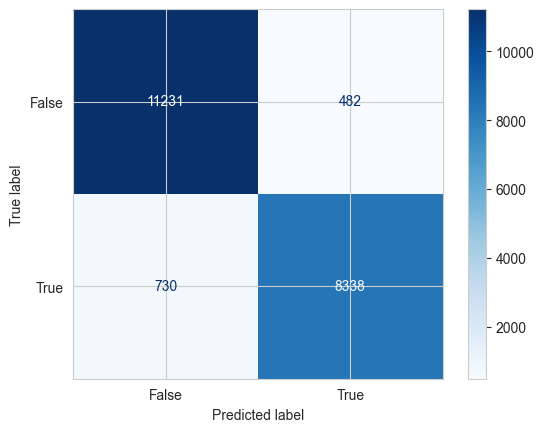

In [79]:
params_catboost = {'random_state': 42}
model_catboost = catboost.CatBoostClassifier(**params_catboost)
model_catboost, roc_auc_catboost = run_model(model_catboost, X_train, y_train, X_val, y_val)

ROC_AUC = 0.933926091719202
              precision    recall  f1-score   support

       False    0.93588   0.95210   0.94392     11713
        True    0.93672   0.91575   0.92611      9068

    accuracy                        0.93624     20781
   macro avg    0.93630   0.93393   0.93502     20781
weighted avg    0.93625   0.93624   0.93615     20781



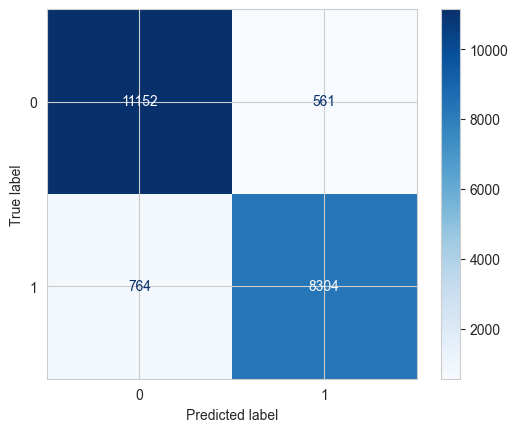

In [80]:
params_xgboost = {'random_state': 42}
model_xgboost = xgboost.XGBClassifier(**params_xgboost)
model_xgboost, roc_auc_xgboost = run_model(model_xgboost, X_train, y_train, X_val, y_val)

ROC_AUC = 0.9251020943819147
              precision    recall  f1-score   support

       False    0.92465   0.95023   0.93726     11713
        True    0.93333   0.89998   0.91635      9068

    accuracy                        0.92830     20781
   macro avg    0.92899   0.92510   0.92681     20781
weighted avg    0.92844   0.92830   0.92814     20781



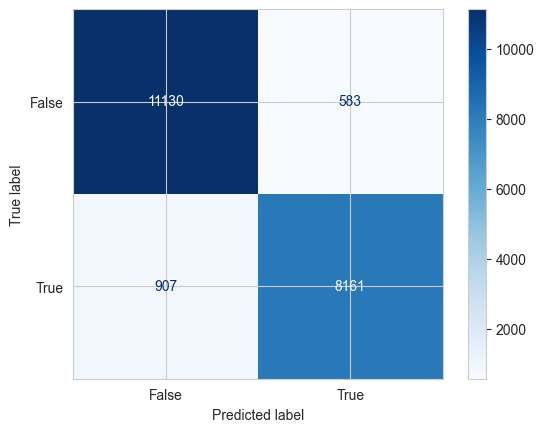

In [81]:
params_lr = {'random_state': 42}
model_lr = HistGradientBoostingClassifier(**params_lr)
model_lr, roc_auc_lr = run_model(model_lr, X_train, y_train, X_val, y_val)

In [82]:
X = df_train_encoded.drop('Satisfaction_Satisfied', axis=1)
y = df_train_encoded['Satisfaction_Satisfied']

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

print(f"Stratified CV scores: {cv_scores}")
print(f"Mean stratified CV score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.96419807 0.96299504 0.96005967 0.96400558 0.96333013]
Mean CV score: 0.9629
Standard deviation: 0.0015
Stratified CV scores: [0.96366874 0.9608296  0.96434243 0.96241759 0.96231954]
Mean stratified CV score: 0.9627
